In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd

In [24]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [26]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

[&#39;measurement&#39;, &#39;station&#39;]

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [31]:
#Use inspector to inspect the columns and the types of the database stations
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [32]:
#Use inspector to inspect columns and types of the database measurements
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [ ]:
***Precipitation Analysis***

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Check the first date in database
early_date=session.query(Measurement.date).order_by(Measurement.date).first()
early_date
#Check the last date in datebase
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

(&#39;2017-08-23&#39;)

In [43]:
#Query the database for precipitation information for the last 12 months
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
ltm_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
           group_by(Measurement.date).all()
ltm_rain

[(&#39;2016-08-23&#39;, 0.0),
 (&#39;2016-08-24&#39;, 0.08),
 (&#39;2016-08-25&#39;, 0.08),
 (&#39;2016-08-26&#39;, 0.0),
 (&#39;2016-08-27&#39;, 0.0),
 (&#39;2016-08-28&#39;, 0.01),
 (&#39;2016-08-29&#39;, 0.0),
 (&#39;2016-08-30&#39;, 0.0),
 (&#39;2016-08-31&#39;, 0.13),
 (&#39;2016-09-01&#39;, 0.0),
 (&#39;2016-09-02&#39;, 0.0),
 (&#39;2016-09-03&#39;, 0.0),
 (&#39;2016-09-04&#39;, 0.03),
 (&#39;2016-09-05&#39;, None),
 (&#39;2016-09-06&#39;, None),
 (&#39;2016-09-07&#39;, 0.05),
 (&#39;2016-09-08&#39;, 0.0),
 (&#39;2016-09-09&#39;, 0.03),
 (&#39;2016-09-10&#39;, 0.0),
 (&#39;2016-09-11&#39;, 0.05),
 (&#39;2016-09-12&#39;, 0.0),
 (&#39;2016-09-13&#39;, 0.02),
 (&#39;2016-09-14&#39;, 1.32),
 (&#39;2016-09-15&#39;, 0.42),
 (&#39;2016-09-16&#39;, 0.06),
 (&#39;2016-09-17&#39;, 0.05),
 (&#39;2016-09-18&#39;, 0.0),
 (&#39;2016-09-19&#39;, 0.0),
 (&#39;2016-09-20&#39;, 0.0),
 (&#39;2016-09-21&#39;, 0.0),
 (&#39;2016-09-22&#39;, 0.02),
 (&#39;2016-09-23&#39;, 0.0),
 (&#39;2016-09-24&#39;, 

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column
ltmrain_df = pd.DataFrame(ltm_rain)
ltmrain_df.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [45]:
# Sort the dataframe by date
ltmrain_df = ltmrain_df.set_index("date")
ltmrain_df.head()
# Use Pandas Plotting with Matplotlib to plot the data

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


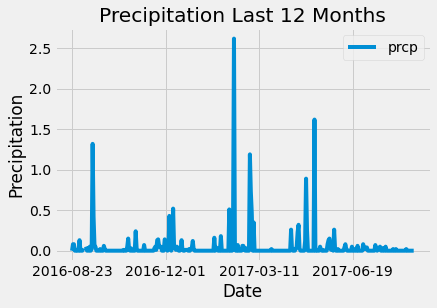

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
ltmrain_df.plot()
#Plot Title, x and y labels
plt.title("Precipitation Last 12 Months")
plt.ylabel("Precipitation")
plt.xlabel("Date")
#save the graph
plt.savefig("Precipation_Analysis")
#Show the graph
plt.show()


In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
ltmrainstats = ltmrain_df.describe()
ltmrainstats

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


***Station Analysis***

In [52]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station.station).count()
total_stations

9

There are 9 stations in the Station dataset.

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
